# Massive Colab Project (Web x AAI)
## **Early Stunting Detection System - Cut Nyak Dien Group**


## 1. Import Library and Package

In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 44.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
%pip show scikit-learn

Name: scikit-learn
Version: 1.5.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
import numpy as np
import pandas as pd
import os
import joblib
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Import Dataset from Kaggle

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rendychristian","key":"ba4667e0c52e4c2124c2d1455ebffcd5"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d rendiputra/stunting-balita-detection-121k-rows

Dataset URL: https://www.kaggle.com/datasets/rendiputra/stunting-balita-detection-121k-rows
License(s): MIT
  0% 0.00/340k [00:00<?, ?B/s]
100% 340k/340k [00:00<00:00, 74.2MB/s]


In [ ]:
!unzip stunting-balita-detection-121k-rows

Archive:  stunting-balita-detection-121k-rows.zip
  inflating: data_balita.csv         


In [ ]:
df = pd.read_csv('data_balita.csv')
df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


## 3. EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [ ]:
df.columns

Index(['Umur (bulan)', 'Jenis Kelamin', 'Tinggi Badan (cm)', 'Status Gizi'], dtype='object')

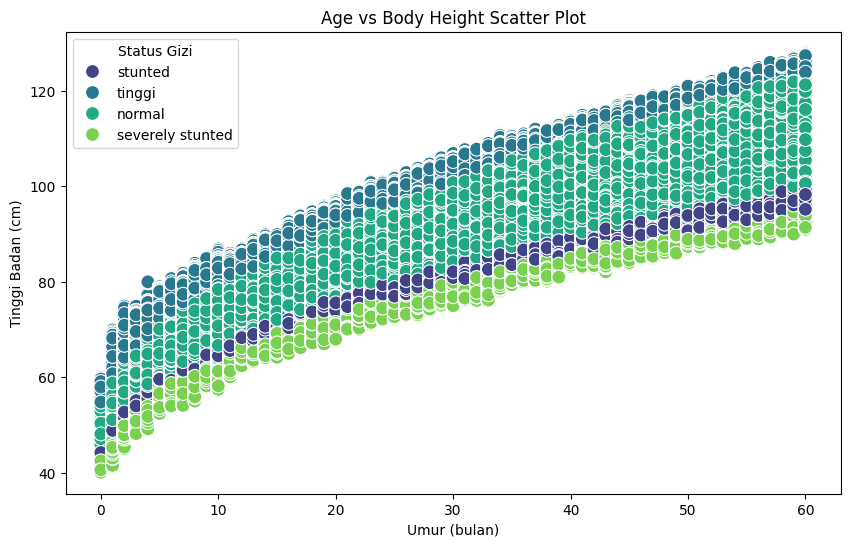

In [ ]:
# Scatter Plot

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Umur (bulan)', y='Tinggi Badan (cm)', hue='Status Gizi', palette='viridis', s=100)
plt.title('Age vs Body Height Scatter Plot')
plt.show()

<ipython-input-12-9581860a5c45>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Jenis Kelamin', palette='Set3')


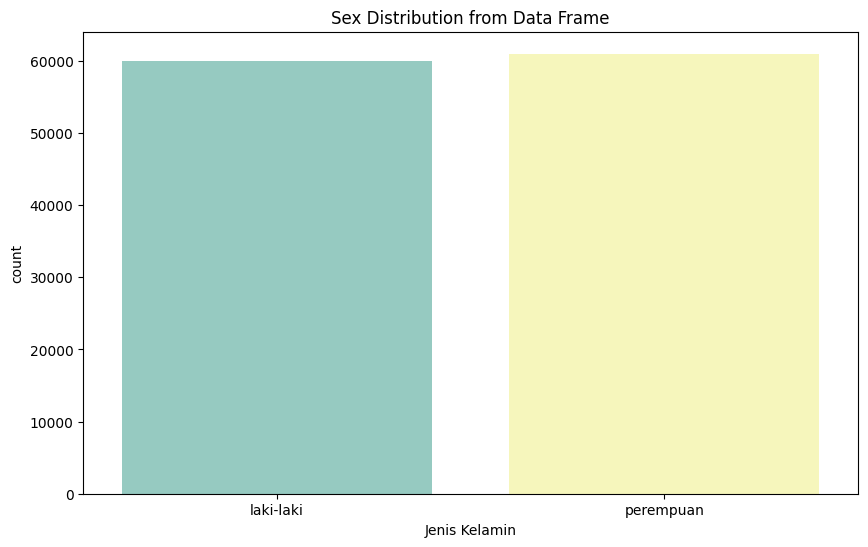

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Jenis Kelamin', palette='Set3')
plt.title('Sex Distribution from Data Frame')
plt.show()

<ipython-input-13-10fb26708f94>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Status Gizi', palette='coolwarm')


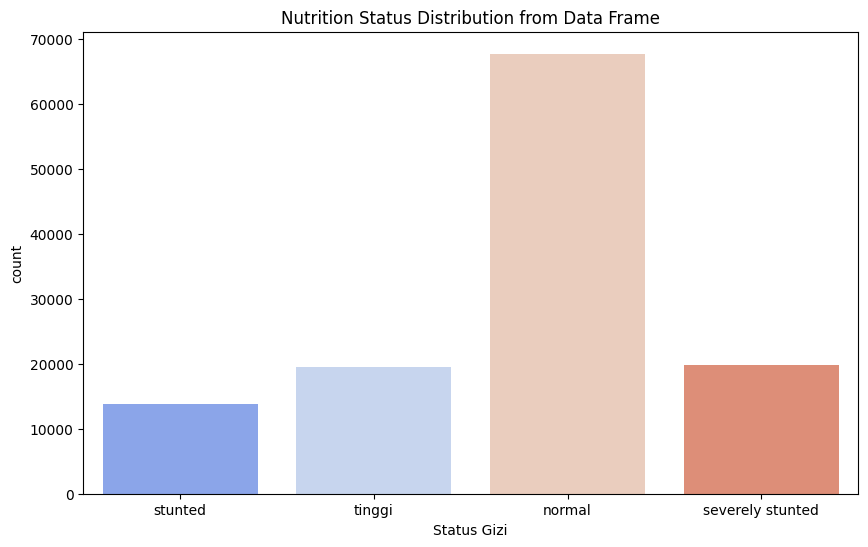

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Status Gizi', palette='coolwarm')
plt.title('Nutrition Status Distribution from Data Frame')
plt.show()

<ipython-input-14-c53c71e62d69>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status Gizi', y='Tinggi Badan (cm)', palette='Set3')


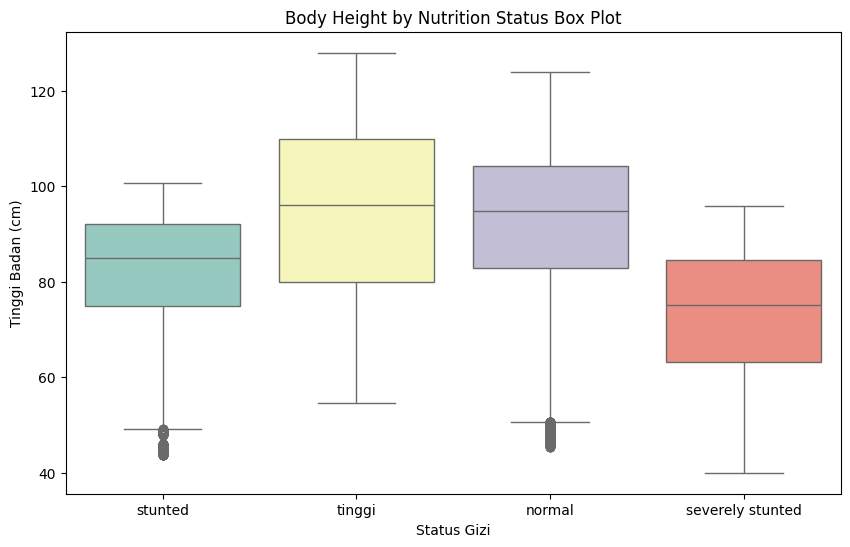

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Status Gizi', y='Tinggi Badan (cm)', palette='Set3')
plt.title('Body Height by Nutrition Status Box Plot')
plt.show()

In [ ]:
statsmodels = df[['Umur (bulan)', 'Tinggi Badan (cm)']].describe()
print(statsmodels)

        Umur (bulan)  Tinggi Badan (cm)
count  120999.000000      120999.000000
mean       30.173803          88.655434
std        17.575119          17.300997
min         0.000000          40.010437
25%        15.000000          77.000000
50%        30.000000          89.800000
75%        45.000000         101.200000
max        60.000000         128.000000


## 4. Data Preparation


In [ ]:
df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


In [ ]:
missing_sex = df['Jenis Kelamin'].isnull()
print("Missing values in 'Jenis Kelamin':", missing_sex.sum())

# Check for missing values in 'Status Gizi' column
missing_status = df['Status Gizi'].isnull()
print("Missing values in 'Status Gizi':", missing_status.sum())

Missing values in 'Jenis Kelamin': 0
Missing values in 'Status Gizi': 0


In [ ]:
# mengkodekan jenis kelamin
df['Jenis Kelamin'] = df['Jenis Kelamin'].map({'laki-laki': 0, 'perempuan': 1})

# mengkodekan status gizi
df['Status Gizi'] = df['Status Gizi'].map({'severely stunted': 0, 'stunted': 1, 'normal': 2, 'tinggi': 3})
df

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,0,44.591973,1
1,0,0,56.705203,3
2,0,0,46.863358,2
3,0,0,47.508026,2
4,0,0,42.743494,0
...,...,...,...,...
120994,60,1,100.600000,2
120995,60,1,98.300000,1
120996,60,1,121.300000,2
120997,60,1,112.200000,2


In [ ]:
# Separate Label and Features
X = df.drop(['Status Gizi'], axis=1)
y = df['Status Gizi']
X

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm)
0,0,0,44.591973
1,0,0,56.705203
2,0,0,46.863358
3,0,0,47.508026
4,0,0,42.743494
...,...,...,...
120994,60,1,100.600000
120995,60,1,98.300000
120996,60,1,121.300000
120997,60,1,112.200000


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (96799, 3)
y_train shape: (96799,)
X_test shape: (24200, 3)
y_test shape: (24200,)


## 5. Model Training

In [ ]:
K = 18
error =[]
accuracy=[]
for i in range(1,K+1):
    knn= KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error.append(1-metrics.accuracy_score(y_test,y_pred))
    accuracy.append(metrics.accuracy_score(y_test,y_pred))

Text(0.5, 1.0, 'accuracy vs K')

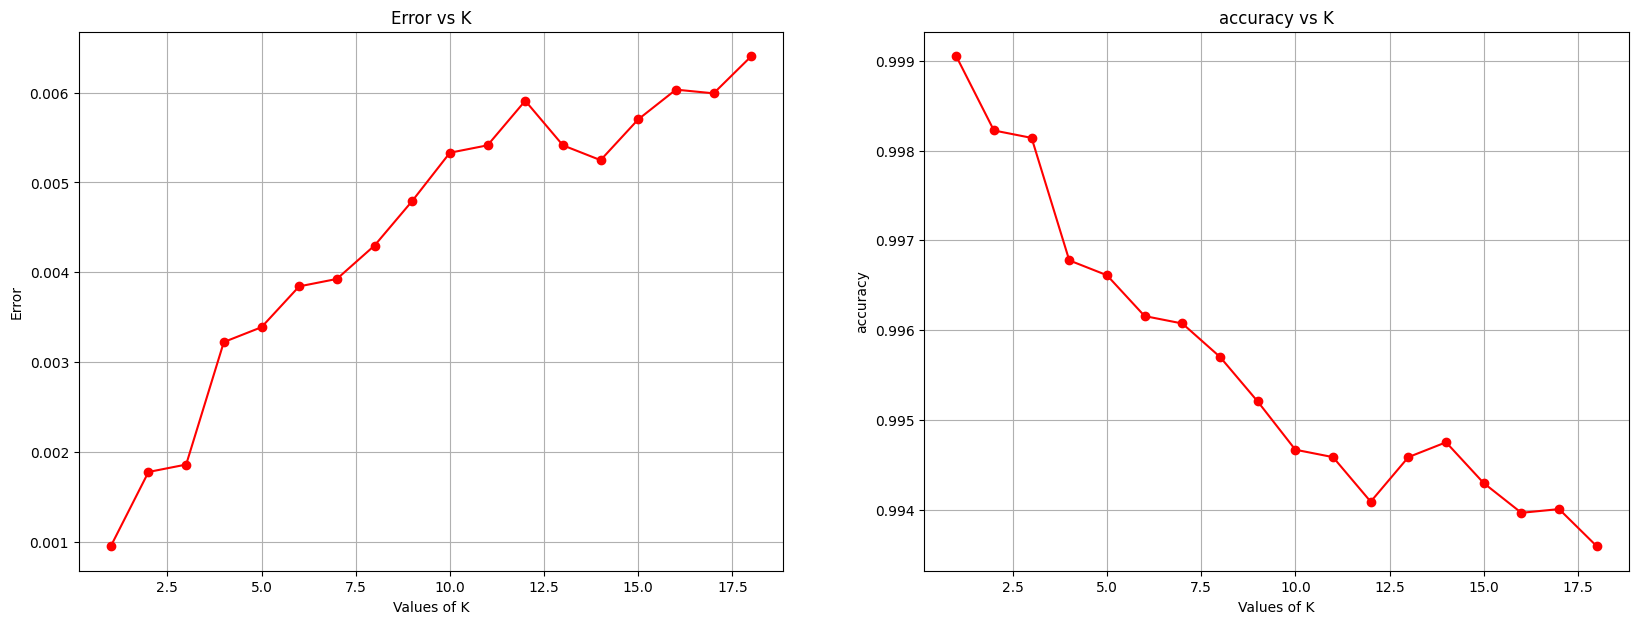

In [ ]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(range(1,19),error,'r-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('Error')
plt.grid()
plt.title('Error vs K')

plt.subplot(1, 2, 2)
plt.plot(range(1,19),accuracy,'r-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('accuracy')
plt.grid()
plt.title('accuracy vs K')

In [ ]:
K=1
clf= KNeighborsClassifier(K)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test)
print("Accuracy :%.3f"%metrics.accuracy_score(y_test,y_pred))

Accuracy :0.999


## 6. Model Evaluation

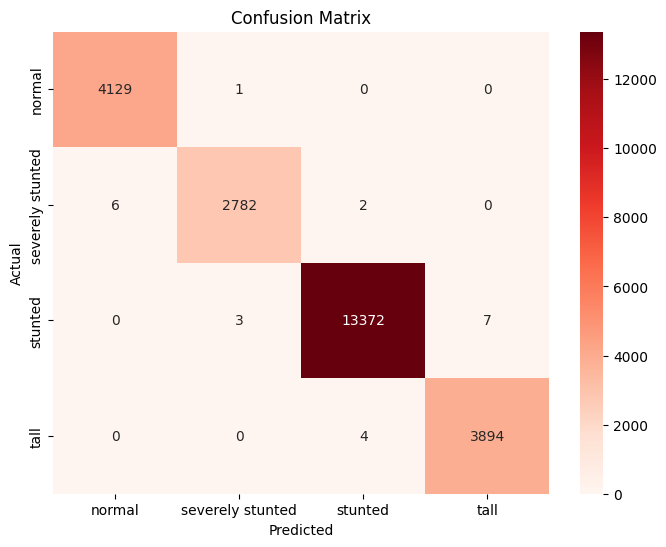

In [ ]:
cm = confusion_matrix(y_test, y_pred)
labels = ['normal', 'severely stunted', 'stunted', 'tall']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test.values.reshape(-1, 1), y_pred))
print('Cross val: ', cross_val_score(knn, y_test.values.reshape(-1, 1), y_pred, cv = 5))
print('Accuracy :%.3f'%np.mean(cross_val_score(knn, y_test.values.reshape(-1, 1), y_pred)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4130
           1       1.00      1.00      1.00      2790
           2       1.00      1.00      1.00     13382
           3       1.00      1.00      1.00      3898

    accuracy                           1.00     24200
   macro avg       1.00      1.00      1.00     24200
weighted avg       1.00      1.00      1.00     24200

Cross val:  [0.99855372 0.99876033 0.99917355 0.99958678 0.99917355]
Accuracy :0.999


In [ ]:
test = pd.DataFrame({'Umur (bulan)': [50], 'Jenis Kelamin': [1], 'Tinggi Badan (cm)': [130]})

pred = knn.predict(test)
print("Predicted Score = {}".format(np.array(pred)))

Predicted Score = [3]


## 6. Import KNN Model

In [ ]:
import pickle

model_filename = 'model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(knn, file)
print('Model Saved Succesfully!')

Model Saved Succesfully!
